# Data Discovery and Statistical Analysis of Public Transport CSV Data

This notebook performs data discovery and statistical analysis on public transport data using pandas, numpy, matplotlib, and seaborn.

## 1. Fetch data from snowflake
- Save it so some local file, fetching such amount of data takes time via such script.

In [1]:
# --- Add this cell at the very beginning of the notebook ---

# Download data from Snowflake and save to a local CSV file

import os

# Install snowflake-connector-python if not already installed
try:
    import snowflake.connector
except ImportError:
    import sys
    !{sys.executable} -m pip install snowflake-connector-python

import pandas as pd

# Snowflake connection parameters (replace with your actual credentials)
SNOWFLAKE_USER = os.getenv("SNOWFLAKE_USER", "MWADOWSKI")
SNOWFLAKE_PASSWORD = os.getenv("SNOWFLAKE_PASSWORD", "1234")
SNOWFLAKE_ACCOUNT = os.getenv("SNOWFLAKE_ACCOUNT", "LVMRDBD-OV75544")
SNOWFLAKE_WAREHOUSE = os.getenv("SNOWFLAKE_WAREHOUSE", "COMPUTE_WH")
SNOWFLAKE_DATABASE = "GTFS_TEST"
SNOWFLAKE_SCHEMA = "SCHEDULE_DATA_MARTS"

# Connect to Snowflake
conn = snowflake.connector.connect(
    user=SNOWFLAKE_USER,
    password=SNOWFLAKE_PASSWORD,
    account=SNOWFLAKE_ACCOUNT,
    warehouse=SNOWFLAKE_WAREHOUSE,
    database=SNOWFLAKE_DATABASE,
    schema=SNOWFLAKE_SCHEMA,
)

# Query to retrieve the data
query = """
SELECT * FROM GTFS_TEST.SCHEDULE_DATA_MARTS.DELAYS_TABLE
WHERE to_date(load_timestamp) BETWEEN '2025-07-06' AND '2025-07-15'
"""

# Fetch data into a pandas DataFrame
df_snowflake = pd.read_sql(query, conn)

# Save to local CSV file
csv_path = "./data.csv"
df_snowflake.to_csv(csv_path, index=False)

# Close the connection
conn.close()

/tmp/ipykernel_1022/1258595031.py:41: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df_snowflake = pd.read_sql(query, conn)


## 2. Import Required Libraries

We will import pandas, numpy, matplotlib.pyplot, and seaborn for data analysis and visualization.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Set seaborn style for better visuals
sns.set(style="whitegrid")

In [2]:
# Load the CSV file
csv_path = "./data.csv"
df = pd.read_csv(filepath_or_buffer=csv_path)

## 3. Preview the Data

Display the first few rows of the DataFrame to understand its structure.

In [5]:
# Preview the first 5 rows
df.head()

,TRIP_ID,STOP_ID,STOP_NAME,TRIP_HEADSIGN,STOP_SEQUENCE,ACTUAL_ARRIVAL,ROUTE_SHORT_NAME,PLANNED_ARRIVAL,MODE,EVENT_DATE,LOAD_TIMESTAMP,SCHEDULE_TIMESTAMP,DELAY
0,1485_34552,3340,Białucha,Czyżyny Dworzec,3,2025-07-07 19:31:55,704,2025-07-07 19:29:00,M,20250707,2025-07-07 17:25:00.000000,2025-07-06,2
1,block_388_trip_22_service_1,stop_189_7329,Politechnika,Zaj. Nowa Huta,6,2025-07-07 23:45:12,3,2025-07-07 23:45:00,T,20250707,2025-07-07 21:40:00.000000,2025-07-06,0
2,block_517_trip_9_service_2,stop_1028_254101,Nad Dłubnią,Kombinat,24,2025-07-12 11:44:57,138,2025-07-12 11:40:00,A,20250712,2025-07-12 09:40:00.000000,2025-07-06,4
3,block_1050_trip_6_service_4,stop_1084_260301,Bulwarowa Ogródki Działkowe,Mistrzejowice,19,2025-07-11 10:10:14,123,2025-07-11 10:08:00,A,20250711,2025-07-11 08:00:00.000000,2025-07-06,2
4,block_692_trip_15_service_3,stop_279_57139,Korona,Nowy Bieżanów P+R,15,2025-07-06 21:15:25,13,2025-07-06 21:15:00,T,20250706,2025-07-06 19:10:00.000000,2025-07-06,0


## 4. Check for Missing Values

Check for and summarize any missing values in the dataset.

In [6]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values[missing_values > 0]

Series([], dtype: int64)

## 5. Data Types and Basic Info

Display data types and basic information about the DataFrame using `info()`.

In [7]:
# Display DataFrame info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 261493 entries, 0 to 261492
Data columns (total 13 columns):
 #   Column              Non-Null Count   Dtype 
---  ------              --------------   ----- 
 0   TRIP_ID             261493 non-null  object
 1   STOP_ID             261493 non-null  object
 2   STOP_NAME           261493 non-null  object
 3   TRIP_HEADSIGN       261493 non-null  object
 4   STOP_SEQUENCE       261493 non-null  int64 
 5   ACTUAL_ARRIVAL      261493 non-null  object
 6   ROUTE_SHORT_NAME    261493 non-null  int64 
 7   PLANNED_ARRIVAL     261493 non-null  object
 8   MODE                261493 non-null  object
 9   EVENT_DATE          261493 non-null  int64 
 10  LOAD_TIMESTAMP      261493 non-null  object
 11  SCHEDULE_TIMESTAMP  261493 non-null  object
 12  DELAY               261493 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 25.9+ MB


## 6. Descriptive Statistics

Use pandas `describe()` to generate descriptive statistics for numerical columns.

In [8]:
# Descriptive statistics for numerical columns
df.describe()

,STOP_SEQUENCE,ROUTE_SHORT_NAME,EVENT_DATE,DELAY
count,261493.000000,261493.000000,2.614930e+05,261493.000000
mean,13.844753,171.948083,2.025071e+07,3.051661
std,9.087730,165.096649,1.801364e+00,10.867436
min,1.000000,1.000000,2.025071e+07,0.000000
25%,6.000000,50.000000,2.025071e+07,0.000000
50%,12.000000,144.000000,2.025071e+07,1.000000
75%,20.000000,229.000000,2.025071e+07,2.000000
max,64.000000,990.000000,2.025072e+07,936.000000


## 7. Analyze Delay Distribution

Visualize and analyze the distribution of the 'DELAY' column using histograms and boxplots.

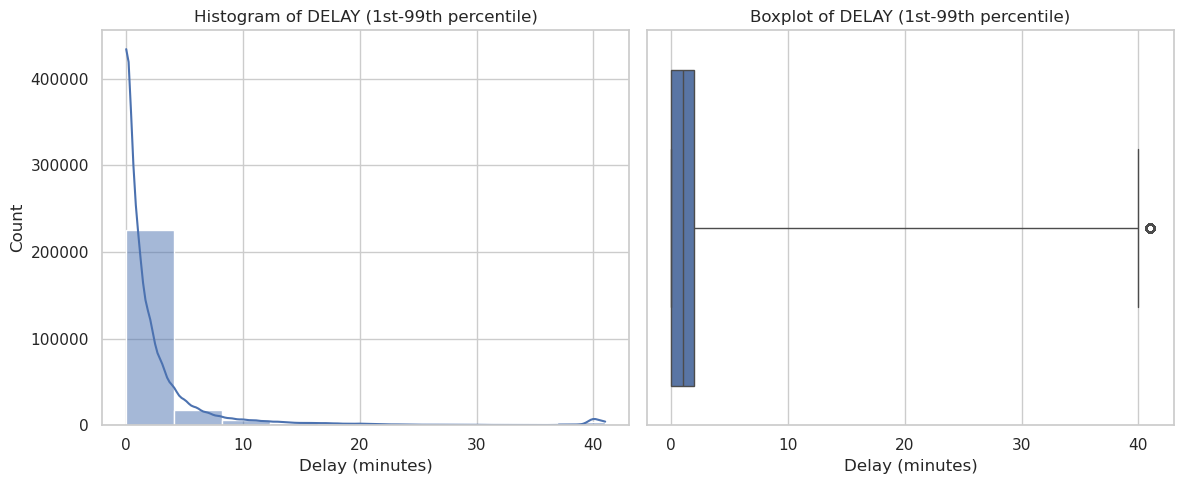

In [16]:
# Analyze Delay Distribution (with outlier filtering)

# Remove both high and low outliers using the 1st and 99th percentiles
# to make plot more readable / informative
low, high = df['DELAY'].quantile([0.01, 0.99])
df_delay_filtered = df[(df['DELAY'] >= low) & (df['DELAY'] <= high)]

plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
sns.histplot(df_delay_filtered['DELAY'], bins=10, kde=True)
plt.title('Histogram of DELAY (1st-99th percentile)')
plt.xlabel('Delay (minutes)')

plt.subplot(1, 2, 2)
sns.boxplot(x=df_delay_filtered['DELAY'], whis=[1, 99])
plt.title('Boxplot of DELAY (1st-99th percentile)')
plt.xlabel('Delay (minutes)')

plt.tight_layout()
plt.show()

## 8. Analyze Arrival Times

Convert arrival time columns to datetime and analyze their distributions.

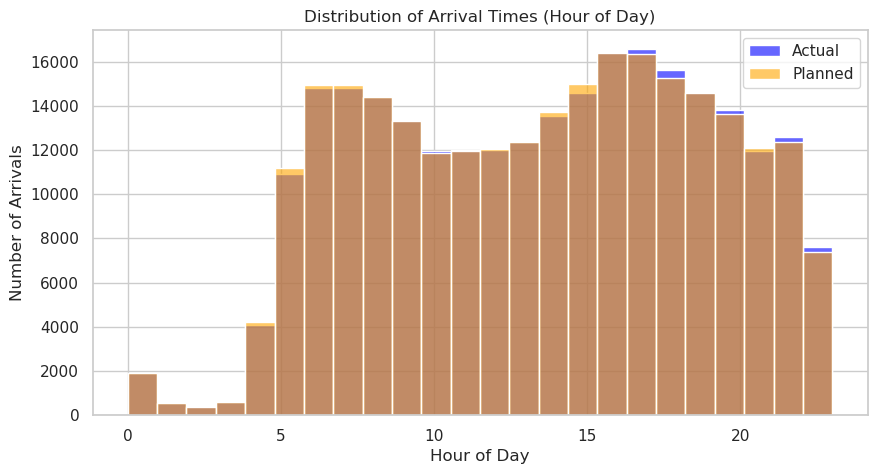

In [10]:
# Convert arrival columns to datetime
df['ACTUAL_ARRIVAL'] = pd.to_datetime(df['ACTUAL_ARRIVAL'])
df['PLANNED_ARRIVAL'] = pd.to_datetime(df['PLANNED_ARRIVAL'])

# Plot distribution of actual and planned arrival times (hour of day)
plt.figure(figsize=(10, 5))
sns.histplot(df['ACTUAL_ARRIVAL'].dt.hour, bins=24, color='blue', label='Actual', alpha=0.6)
sns.histplot(df['PLANNED_ARRIVAL'].dt.hour, bins=24, color='orange', label='Planned', alpha=0.6)
plt.title('Distribution of Arrival Times (Hour of Day)')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Arrivals')
plt.legend()
plt.show()

## 9. Correlation Analysis

Compute and visualize correlations between numerical columns, especially focusing on DELAY.

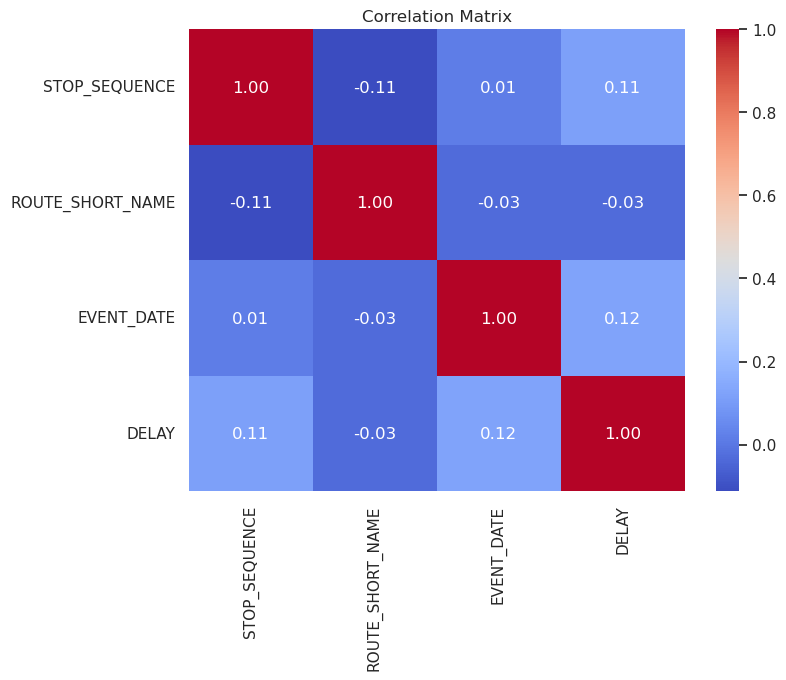

In [11]:
# Select numerical columns for correlation
numeric_cols = df.select_dtypes(include=[np.number])

# Compute correlation matrix
corr_matrix = numeric_cols.corr()

# Visualize correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

## 10. Visualize Delay by Route

Create bar plots or boxplots to show delay statistics grouped by 'ROUTE_SHORT_NAME'.

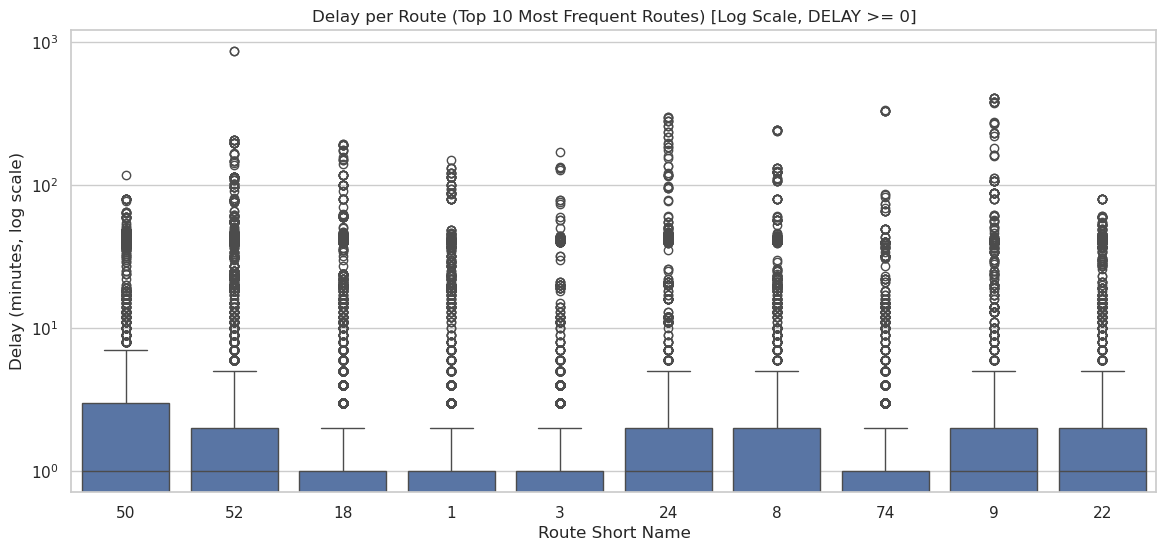

In [49]:
# Delay per route (top 10 most frequent routes) with boxplot for each route, log scale for y-axis (no negative values)
top_routes = df['ROUTE_SHORT_NAME'].value_counts().nlargest(10).index
df_top_routes = df[df['ROUTE_SHORT_NAME'].isin(top_routes)]

plt.figure(figsize=(14, 6))
sns.boxplot(x='ROUTE_SHORT_NAME', y='DELAY', data=df_top_routes[df_top_routes['DELAY'] >= 0], order=top_routes)
plt.yscale('log')  # Log scale, only for positive values
plt.title('Delay per Route (Top 10 Most Frequent Routes) [Log Scale, DELAY >= 0]')
plt.xlabel('Route Short Name')
plt.ylabel('Delay (minutes, log scale)')
plt.show()

## 11. Visualize Delay by Mode

Visualize average or median delay for each transport mode using bar plots.

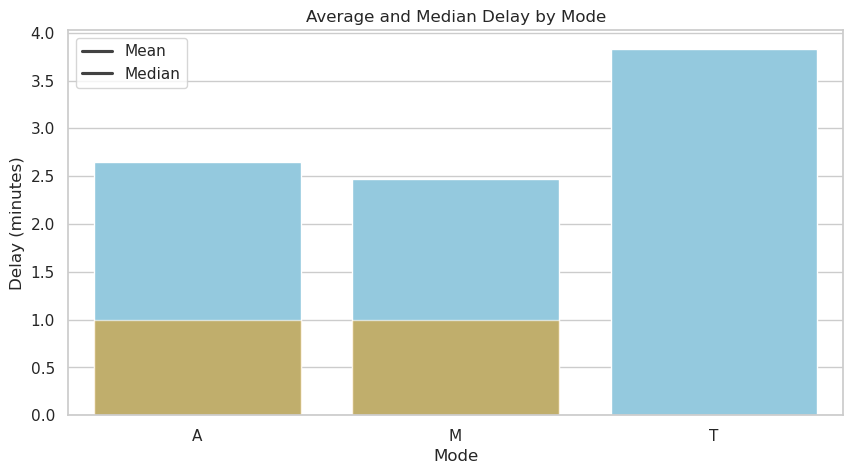

In [13]:
# Calculate mean and median delay by mode
delay_by_mode = df.groupby('MODE')['DELAY'].agg(['mean', 'median']).reset_index()

plt.figure(figsize=(10, 5))
sns.barplot(x='MODE', y='mean', data=delay_by_mode, color='skyblue', label='Mean')
sns.barplot(x='MODE', y='median', data=delay_by_mode, color='orange', alpha=0.6, label='Median')
plt.title('Average and Median Delay by Mode')
plt.xlabel('Mode')
plt.ylabel('Delay (minutes)')
plt.legend(['Mean', 'Median'])
plt.show()

## 12. Visualize Stop Sequence vs Delay

Plot stop sequence against delay to identify any patterns.

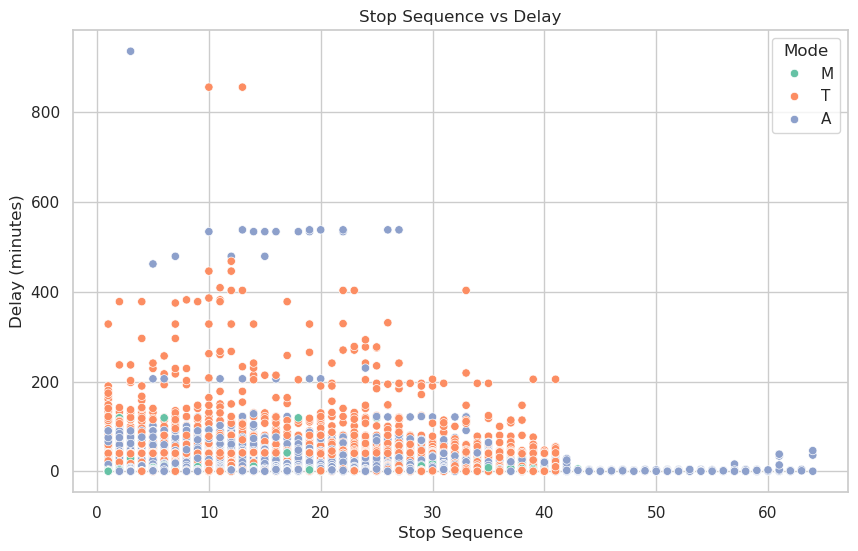

In [19]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='STOP_SEQUENCE', y='DELAY', data=df, hue='MODE', palette='Set2')
plt.title('Stop Sequence vs Delay')
plt.xlabel('Stop Sequence')
plt.ylabel('Delay (minutes)')
plt.legend(title='Mode')
plt.show()

# 15. Visualize Stop names with worst average delay (top 10)

/tmp/ipykernel_3572/181426815.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_stops.values, y=top_stops.index, palette='Reds_r')


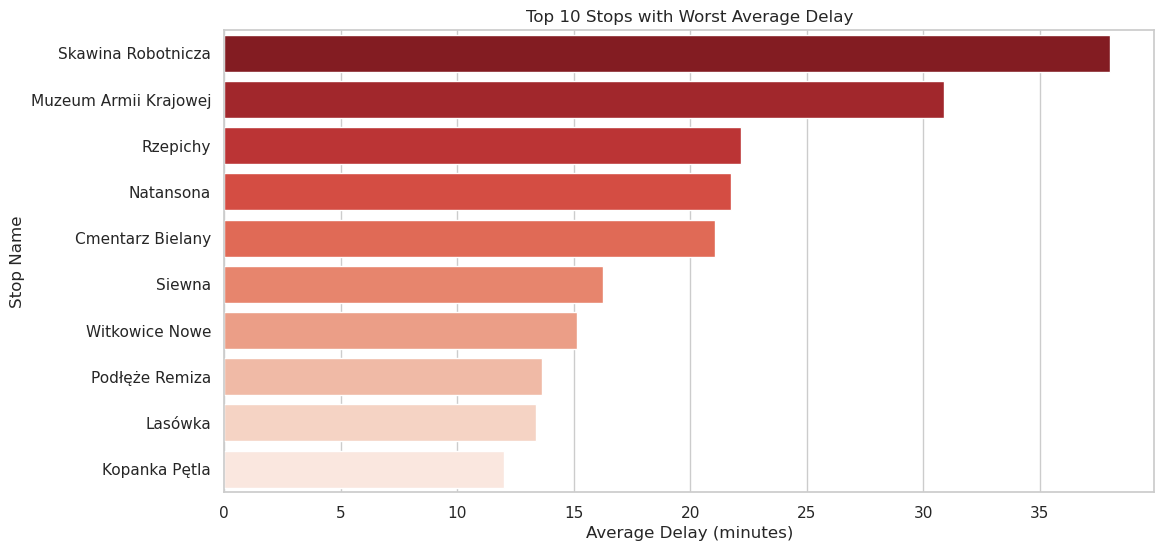

In [22]:
# Visualize STOP_NAMEs with the worst average delay (top 10)
top_stops = df.groupby('STOP_NAME')['DELAY'].mean().nlargest(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_stops.values, y=top_stops.index, palette='Reds_r')
plt.title('Top 10 Stops with Worst Average Delay')
plt.xlabel('Average Delay (minutes)')
plt.ylabel('Stop Name')
plt.show()


# 15. Visualize routes with worst average delay (top 10)

/tmp/ipykernel_3572/1246526415.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_routes_delay.values, y=top_routes_delay.index.astype(str), palette='Reds_r')


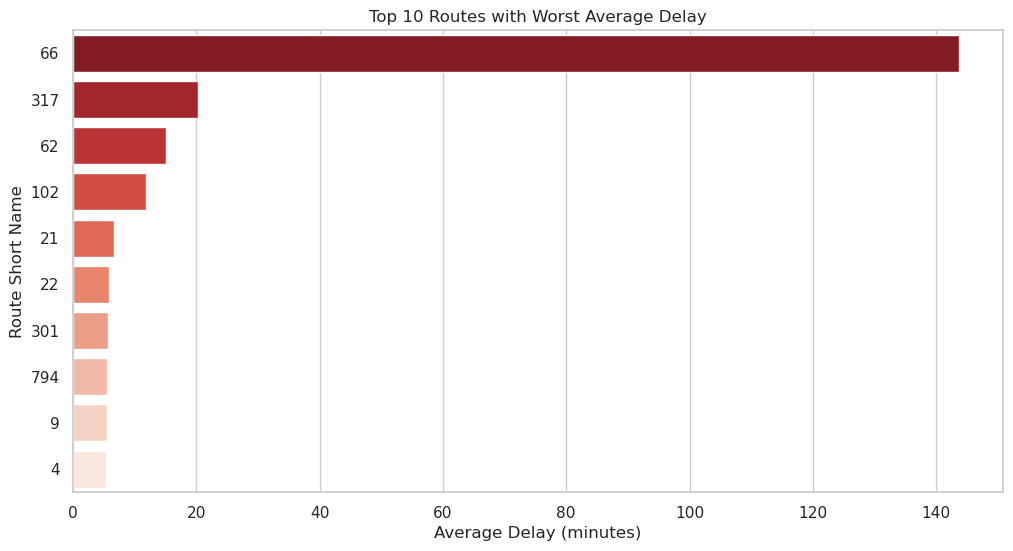

In [27]:
# Visualize ROUTE_SHORT_NAMEs with the worst average delay (top 10)
top_routes_delay = df.groupby('ROUTE_SHORT_NAME')['DELAY'].mean().nlargest(10)
plt.figure(figsize=(12, 6))
sns.barplot(x=top_routes_delay.values, y=top_routes_delay.index.astype(str), palette='Reds_r')
plt.title('Top 10 Routes with Worst Average Delay')
plt.xlabel('Average Delay (minutes)')
plt.ylabel('Route Short Name')
plt.show()

# 16. Average delay by hour of the day (regardless of the day of the week)

/tmp/ipykernel_3572/756256440.py:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(x='hour', y='DELAY', data=df, estimator='mean', ci=None, marker='o')


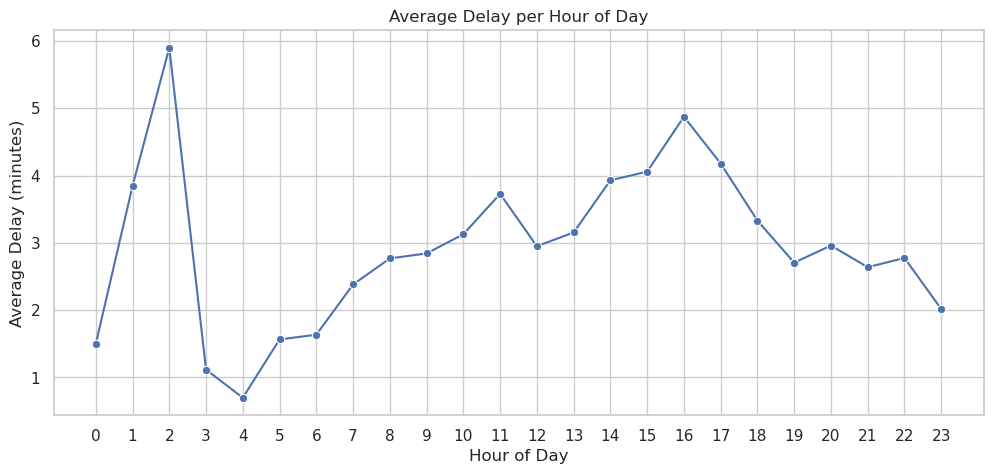

In [28]:
# Ensure ACTUAL_ARRIVAL is datetime
df['ACTUAL_ARRIVAL'] = pd.to_datetime(df['ACTUAL_ARRIVAL'])

# Extract hour and weekday
df['hour'] = df['ACTUAL_ARRIVAL'].dt.hour
df['weekday'] = df['ACTUAL_ARRIVAL'].dt.day_name()

# Average delay per hour of day
plt.figure(figsize=(12, 5))
sns.lineplot(x='hour', y='DELAY', data=df, estimator='mean', ci=None, marker='o')
plt.title('Average Delay per Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Delay (minutes)')
plt.xticks(range(0, 24))
plt.show()


# 17. Average delay per hour and weekday (heatmap)

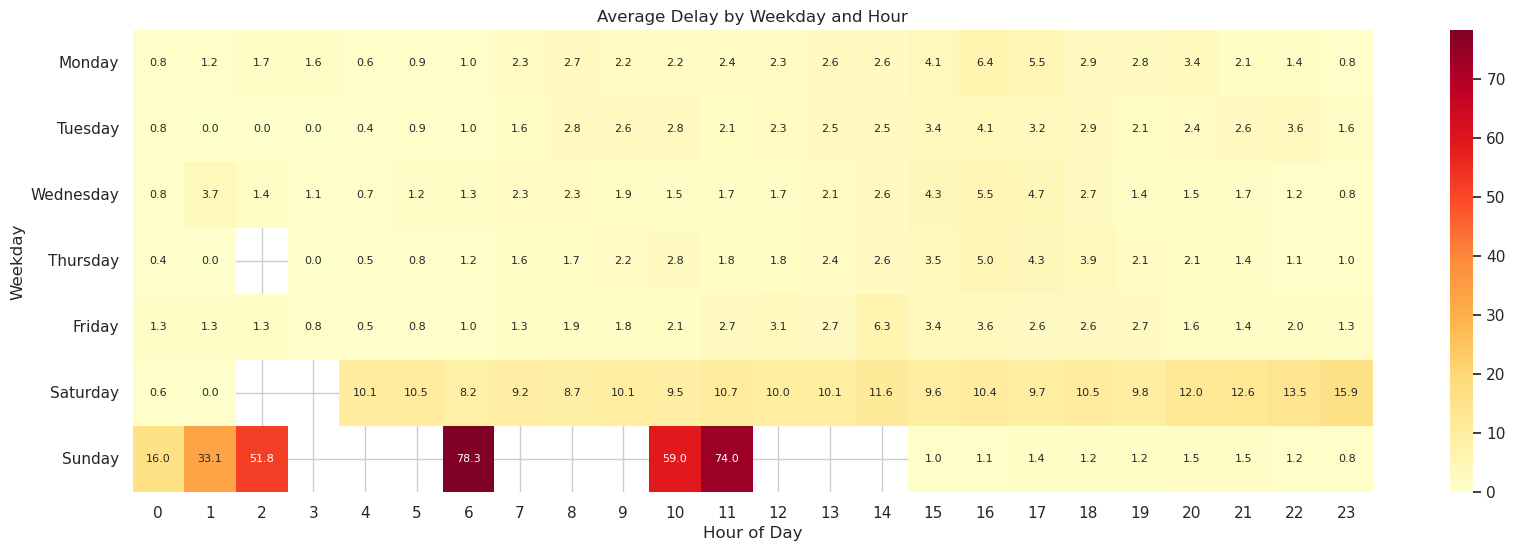

In [30]:
# Average delay per hour and weekday (heatmap)
pivot = df.pivot_table(index='weekday', columns='hour', values='DELAY', aggfunc='mean')
# Ensure weekdays are in correct order
ordered_days = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
pivot = pivot.reindex(ordered_days)

plt.figure(figsize=(20, 6))  # Make plot wider
sns.heatmap(
    pivot,
    cmap='YlOrRd',
    annot=True,
    fmt=".1f",
    annot_kws={"size": 8}  # Make numbers smaller
)
plt.title('Average Delay by Weekday and Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Weekday')
plt.show()

# 18. Average delay per weekday (barplot)

/tmp/ipykernel_3572/2388795929.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=weekday_avg.index, y=weekday_avg.values, palette='Blues')


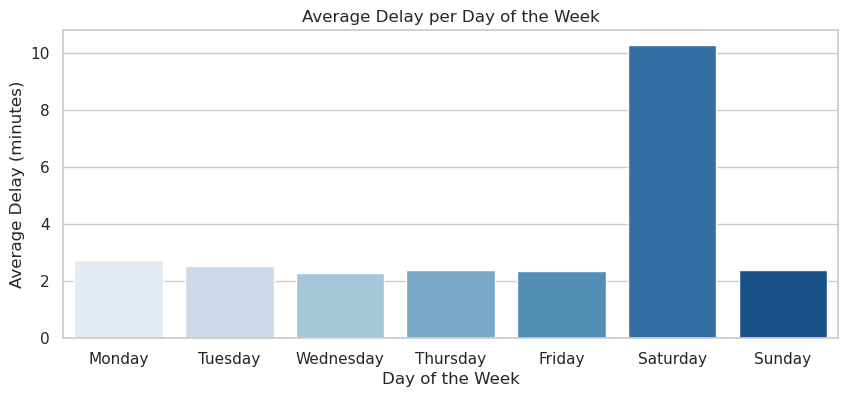

In [ ]:
# Average delay per weekday (barplot)
weekday_avg = df.groupby('weekday')['DELAY'].mean().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)

plt.figure(figsize=(10, 4))
sns.barplot(x=weekday_avg.index, y=weekday_avg.values, palette='Blues')
plt.title('Average Delay per Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Delay (minutes)')
plt.show()


# 19. Delay Trends Over Time (average delay per day)

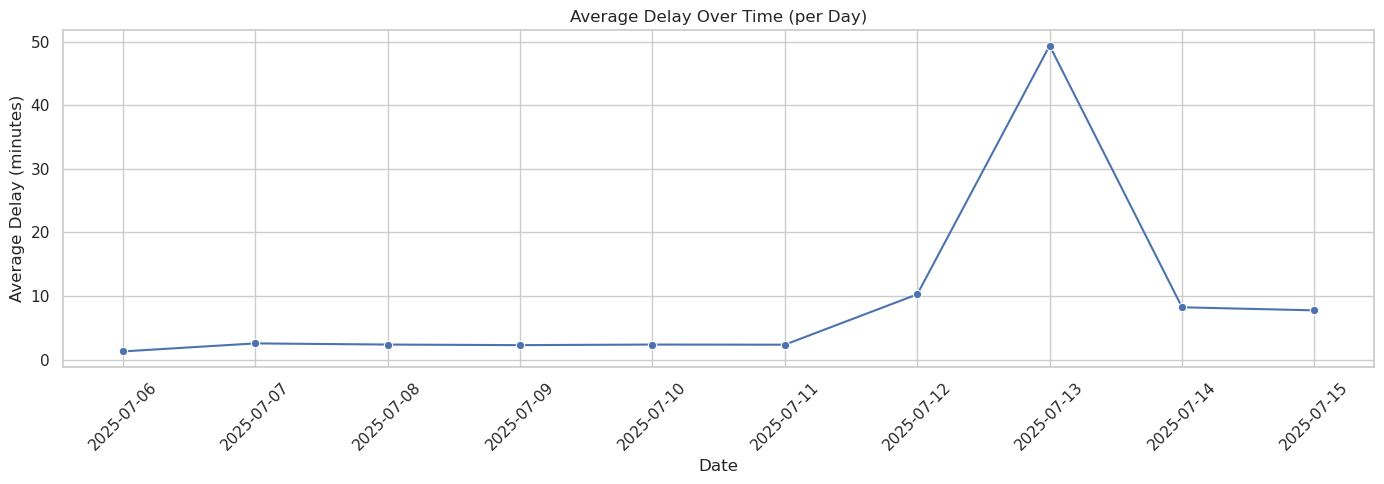

In [33]:
df['date'] = pd.to_datetime(df['ACTUAL_ARRIVAL']).dt.date
daily_delay = df.groupby('date')['DELAY'].mean()
plt.figure(figsize=(14, 5))
sns.lineplot(x=daily_delay.index, y=daily_delay.values, marker='o')
plt.title('Average Delay Over Time (per Day)')
plt.xlabel('Date')
plt.ylabel('Average Delay (minutes)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# 20. Delay by Stop Sequence Position


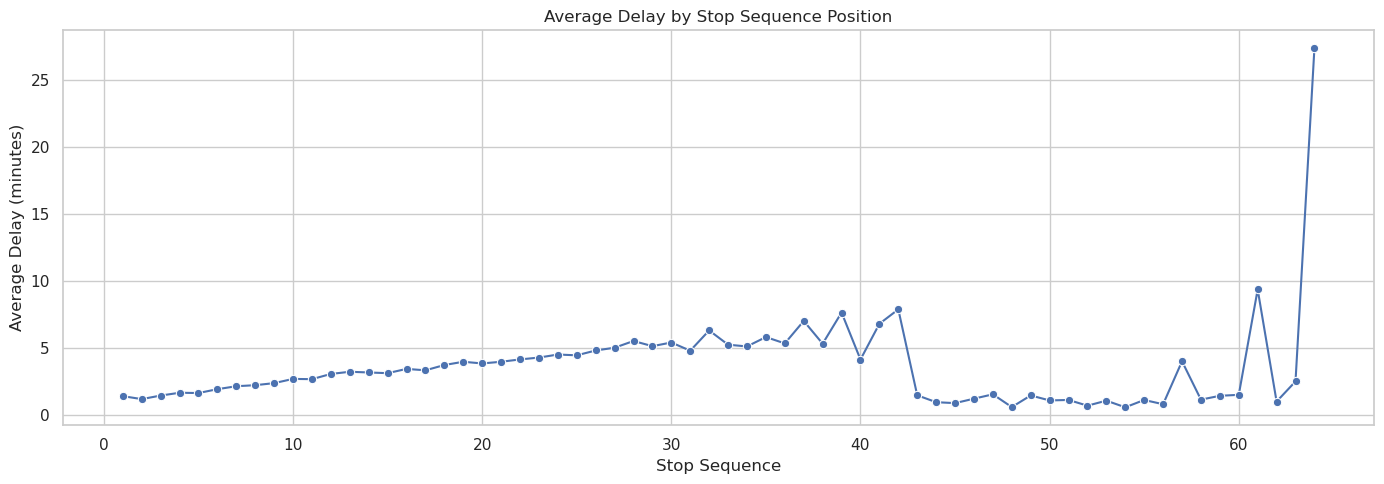

In [44]:
stop_seq_avg = df.groupby('STOP_SEQUENCE')['DELAY'].mean()
plt.figure(figsize=(14, 5))
sns.lineplot(x=stop_seq_avg.index, y=stop_seq_avg.values, marker='o')
plt.title('Average Delay by Stop Sequence Position')
plt.xlabel('Stop Sequence')
plt.ylabel('Average Delay (minutes)')
plt.tight_layout()
plt.show()

# 21. On-Time Performance Rate

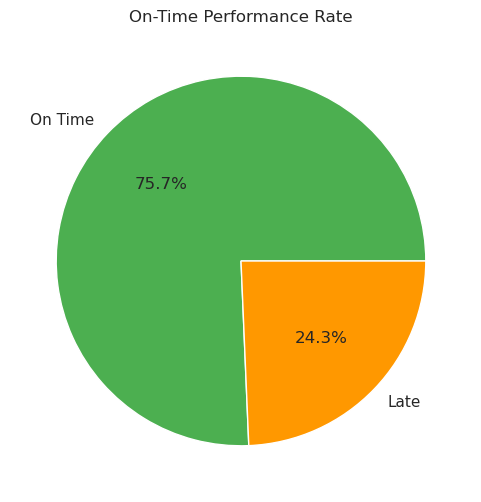

In [40]:
on_time = ((df['DELAY'] >= -1) & (df['DELAY'] <= 2)).mean()
late = (df['DELAY'] > 2).mean()
labels = ['On Time', 'Late']
sizes = [on_time, late]
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['#4CAF50', '#FF9800'])
plt.title('On-Time Performance Rate')
plt.show()

# 22. Delay Distribution by Mode and Route (top 3 modes, top 5 routes per mode)

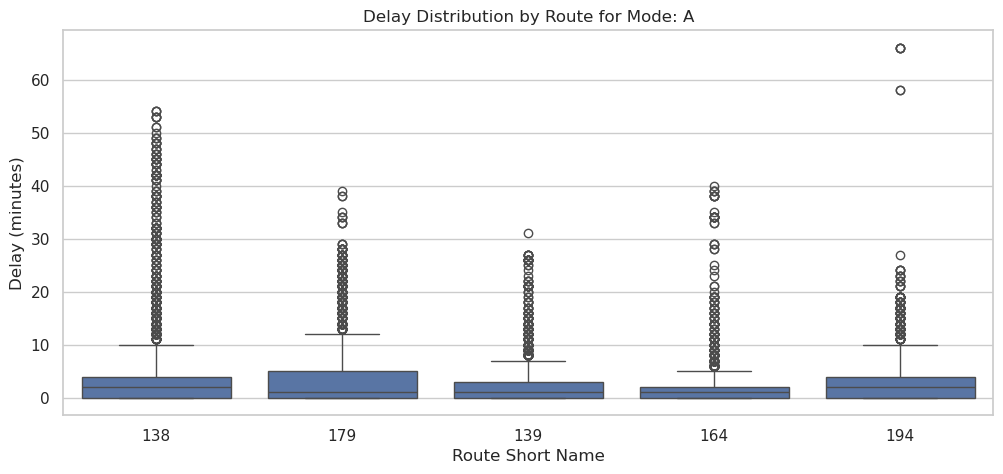

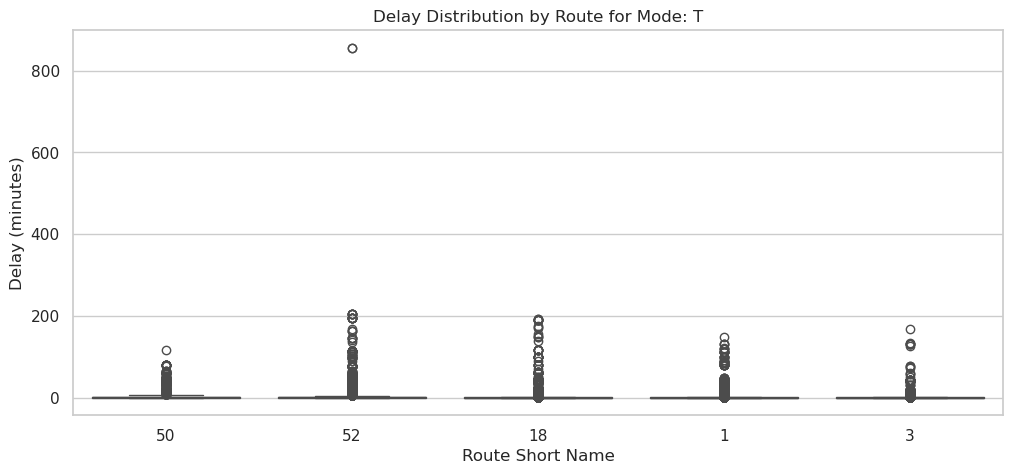

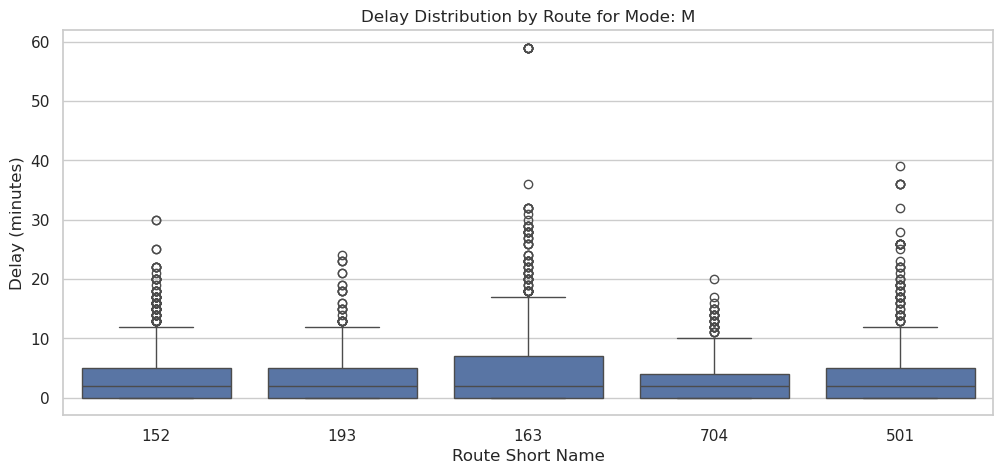

In [42]:
top_modes = df['MODE'].value_counts().nlargest(3).index
for mode in top_modes:
    df_mode = df[df['MODE'] == mode]
    top_routes_mode = df_mode['ROUTE_SHORT_NAME'].value_counts().nlargest(5).index
    df_mode_top_routes = df_mode[df_mode['ROUTE_SHORT_NAME'].isin(top_routes_mode)]
    plt.figure(figsize=(12, 5))
    sns.boxplot(x='ROUTE_SHORT_NAME', y='DELAY', data=df_mode_top_routes, order=top_routes_mode)
    plt.title(f'Delay Distribution by Route for Mode: {mode}')
    plt.xlabel('Route Short Name')
    plt.ylabel('Delay (minutes)')
    plt.show()